# EJERCICIOS

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [30]:
cifar10 = tf.keras.datasets.cifar10.load_data()

In [31]:
print(cifar10[0])

(array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
       

In [32]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10

# Usar 50,000 imágenes para entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# Dividir las 10,000 imágenes de prueba en 5,000 para validación y 5,000 para prueba
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]

# Verificar las formas
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape) 

Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Forma de x_val: (5000, 32, 32, 3)
Forma de y_val: (5000, 1)
Forma de x_test: (5000, 32, 32, 3)
Forma de y_test: (5000, 1)


In [33]:
# Definimos un diccionario de categorias para traducir las etiquetas
def get_category_name(label):
    categories = {
        0: "Avión",
        1: "Automóvil",
        2: "Pájaro",
        3: "Gato",
        4: "Ciervo",
        5: "Perro",
        6: "Rana",
        7: "Caballo",
        8: "Barco",
        9: "Camión"
    }
    return categories.get(label, "ERROR")

def display_image(data,tag=""):
    """
    Muestra una única imagen utilizando plt.imshow.

    Parámetros:
    - data: Imagen en formato numpy array (32x32x3, por ejemplo).
    Opcionales:
    - tag: Etiqueta de la imagen con un str del número a adivinar.
    """
    plt.figure(figsize=(2, 1)) # Hacer la imagen más pequeña
    plt.imshow(data)
    plt.axis('off')  # Ocultar los ejes
    if tag !="":
        plt.title(get_category_name(tag))
    plt.show()

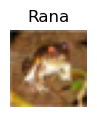

In [34]:
# Probamos la función
display_image(x_train[0],y_train[0][0])

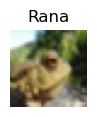

In [35]:
import random
# Modo aleatorio para ver unas pocas imágenes
rand_int = random.randint(0, 50000)
display_image(x_train[rand_int],y_train[rand_int][0])

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [36]:
# Construcción del modelo
model = tf.keras.models.Sequential()

# Capa de entrada
model.add(tf.keras.layers.Input(shape=(32,32,3)))

# Capa Flatten
model.add(tf.keras.layers.Flatten())

# 20 capas ocultas de 100 neuronas cada una con inicialización He y activación Swish
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'))

# Capa de salida de 10 clases
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [37]:
import time

learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
results = []

for lr in learning_rates:

    # Compilar
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])

    # Entrenamiento
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    # Evaluación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    # Guardar los resultados en el diccionario
    results.append({
        'Red neuronal normal': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Imprimir resultados
for result in results:
    print(result)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 8.9837 - sparse_categorical_accuracy: 0.1924 - val_loss: 1.8827 - val_sparse_categorical_accuracy: 0.2896
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.9258 - sparse_categorical_accuracy: 0.2925 - val_loss: 1.9125 - val_sparse_categorical_accuracy: 0.3086
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.8519 - sparse_categorical_accuracy: 0.3209 - val_loss: 1.7748 - val_sparse_categorical_accuracy: 0.3572
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.8361 - sparse_categorical_accuracy: 0.3274 - val_loss: 1.8332 - val_sparse_categorical_accuracy: 0.3270
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 1.8480 - sparse_categorical_accuracy: 0.3244 - val_loss: 1.8045 - val_sparse_categorical_accuracy: 0.3398
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 1.7380 - sparse_categorical_accuracy: 0.3670 - val_loss: 1.6785 - val_sparse_categorical_accuracy:

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [ ]:
import tensorflow as tf
import time

best_lr = 1e-7

# Recompilamos con el nuevo lr
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

# Crear un callback para el early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True # Se ponen los mejores pesos automáticamente, no hay necesidad de ponerlos a mano
)

# Entrenamiento con detención temprana
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), 
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

# Evaluación del modelo
train_accuracy = model.evaluate(x_train, y_train, verbose=0)[1] # Evaluar en entrenamiento y validación usando los mejores pesos
val_accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar la mejor época considerando early stopping
if early_stopping_callback.stopped_epoch == 5:
    best_epoch = 1 # No ha mejorado
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

# Almacenar los resultados en el diccionario
results.append({
    'Red neuronal normal con detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

# Imprimir resultados
for result in results:
    print(result)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.5635 - sparse_categorical_accuracy: 0.4349 - val_loss: 1.5988 - val_sparse_categorical_accuracy: 0.4246
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5678 - sparse_categorical_accuracy: 0.4317 - val_loss: 1.5988 - val_sparse_categorical_accuracy: 0.4250
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5686 - sparse_categorical_accuracy: 0.4336 - val_loss: 1.5988 - val_sparse_categorical_accuracy: 0.4250
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5700 - sparse_categorical_accuracy: 0.4340 - val_loss: 1.5988 - val_sparse_categorical_accuracy: 0.4250
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5725 - sparse_categorical_accuracy: 0.4293 - val_loss: 1.5988 - val_sparse_categorical_accuracy: 0.4256
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5710 - sparse_categorical_accuracy: 0.4306 - val_loss: 1.5987 - val_sparse_categorical_acc

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [39]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# Reconstrucción
model_norm = tf.keras.models.Sequential()

# Capa de entrada
model_norm.add(tf.keras.layers.InputLayer(shape=(32, 32, 3)))

# Capa Flatten
model_norm.add(tf.keras.layers.Flatten())

# 20 capas ocultas de 100 neuronas cada una con inicialización He, activación Swish y normalización por lotes
for _ in range(20):
    model_norm.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
    model_norm.add(tf.keras.layers.BatchNormalization())
    model_norm.add(tf.keras.layers.Activation('swish'))

# Capa de salida de 10 clases
model_norm.add(tf.keras.layers.Dense(10, activation='softmax'))

learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for lr in learning_rates:

    # Compilar
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_norm.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])

    # Entrenamiento
    start_time = time.time()
    history = model_norm.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    # Evaluación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    # Guardar los resultados en el diccionario
    results.append({
        'Red neuronal normalizada': { # Error tipografico en ejecución
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Imprimir resultados
for result in results:
    print(result)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 2.1129 - sparse_categorical_accuracy: 0.2336 - val_loss: 1.8543 - val_sparse_categorical_accuracy: 0.3430
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 1.7485 - sparse_categorical_accuracy: 0.3725 - val_loss: 1.6861 - val_sparse_categorical_accuracy: 0.3954
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 1.6688 - sparse_categorical_accuracy: 0.4029 - val_loss: 1.7797 - val_sparse_categorical_accuracy: 0.3862
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 1.6012 - sparse_categorical_accuracy: 0.4300 - val_loss: 1.6088 - val_sparse_categorical_accuracy: 0.4326
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 1.5463 - sparse_categorical_accuracy: 0.4524 - val_loss: 1.7131 - val_sparse_categorical_accuracy: 0.3844
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 1.4163 - sparse_categorical_accuracy: 0.4947 - val_loss: 1.3407 - val_sparse_categorical_acc

In [40]:
best_lr = 1e-6

# Recompilamos con el nuevo lr
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_norm.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

# Entrenamiento con detención temprana
start_time = time.time()
history = model_norm.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), 
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

# Evaluación del modelo
train_accuracy = model_norm.evaluate(x_train, y_train, verbose=0)[1] # Evaluar en entrenamiento y validación usando los mejores pesos
val_accuracy = model_norm.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar la mejor época considerando early stopping
if early_stopping_callback.stopped_epoch == 5:
    best_epoch = 1 # No ha mejorado
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

# Almacenar los resultados en el diccionario
results.append({
    'Red neuronal normalizada con detención temprana': { # Error tipografico en ejecución
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

# Imprimir resultados
for result in results:
    print(result)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 1.2728 - sparse_categorical_accuracy: 0.5463 - val_loss: 1.2999 - val_sparse_categorical_accuracy: 0.5414
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 1.2748 - sparse_categorical_accuracy: 0.5441 - val_loss: 1.3010 - val_sparse_categorical_accuracy: 0.5404
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 1.2691 - sparse_categorical_accuracy: 0.5459 - val_loss: 1.2998 - val_sparse_categorical_accuracy: 0.5402
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 1.2665 - sparse_categorical_accuracy: 0.5491 - val_loss: 1.2997 - val_sparse_categorical_accuracy: 0.5434
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 1.2654 - sparse_categorical_accuracy: 0.5492 - val_loss: 1.3002 - val_sparse_categorical_accuracy: 0.5402
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 1.2696 - sparse_categorical_accuracy: 0.5456 - val_loss: 1.3003 - val_sparse_categoric

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [41]:
import numpy as np
# Estandarizar los datos

mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

# ESTO ES PERMANENTE, NO VOLVER A ESTANDARIZAR
x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (x_test - mean) / std

# Construcción del modelo
model_selu = tf.keras.models.Sequential()

# Capa de entrada
model_selu.add(tf.keras.layers.InputLayer(shape=(32, 32, 3)))  # Capa de entrada explícita

# Capa Flatten
model_selu.add(tf.keras.layers.Flatten())

# 20 capas ocultas de 100 neuronas cada una con inicialización LeCun normal y activación SELU
for _ in range(20):
    model_selu.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))  # Capa densa con activación SELU

# Capa de salida de 10 clases
model_selu.add(tf.keras.layers.Dense(10, activation='softmax'))

# Pruebas de lr
learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for lr in learning_rates:

    # Compilar
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_selu.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])

    # Entrenamiento
    start_time = time.time()
    history = model_selu.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    # Evaluación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    # Guardar los resultados en el diccionario
    results.append({
        'Red neuronal SELU': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Imprimir resultados
for result in results:
    print(result)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 2.0858 - sparse_categorical_accuracy: 0.2536 - val_loss: 1.7991 - val_sparse_categorical_accuracy: 0.3642
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.7644 - sparse_categorical_accuracy: 0.3638 - val_loss: 1.6667 - val_sparse_categorical_accuracy: 0.4054
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6559 - sparse_categorical_accuracy: 0.4116 - val_loss: 1.6255 - val_sparse_categorical_accuracy: 0.4358
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5841 - sparse_categorical_accuracy: 0.4366 - val_loss: 1.5693 - val_sparse_categorical_accuracy: 0.4576
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5294 - sparse_categorical_accuracy: 0.4604 - val_loss: 1.5435 - val_sparse_categorical_accuracy: 0.4708
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 1.3720 - sparse_categorical_accuracy: 0.5150 - val_loss: 1.3965 - val_sparse_categorical_accuracy:

In [ ]:
best_lr = 1e-7

# Recompilamos con el nuevo lr
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_selu.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

# Entrenamiento con detención temprana
start_time = time.time()
history = model_selu.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), 
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

# Evaluación del modelo
train_accuracy = model_selu.evaluate(x_train, y_train, verbose=0)[1] # Evaluar en entrenamiento y validación usando los mejores pesos
val_accuracy = model_selu.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar la mejor época considerando early stopping
if early_stopping_callback.stopped_epoch == 5:
    best_epoch = 1 # No ha mejorado
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

# Almacenar los resultados en el diccionario
results.append({
    'Red neuronal SELU con detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

# Imprimir resultados
for result in results:
    print(result)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 1.1477 - sparse_categorical_accuracy: 0.5955 - val_loss: 1.3799 - val_sparse_categorical_accuracy: 0.5186
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1490 - sparse_categorical_accuracy: 0.5931 - val_loss: 1.3799 - val_sparse_categorical_accuracy: 0.5186
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1502 - sparse_categorical_accuracy: 0.5934 - val_loss: 1.3799 - val_sparse_categorical_accuracy: 0.5186
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1400 - sparse_categorical_accuracy: 0.5973 - val_loss: 1.3799 - val_sparse_categorical_accuracy: 0.5186
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1536 - sparse_categorical_accuracy: 0.5897 - val_loss: 1.3799 - val_sparse_categorical_accuracy: 0.5186
{'Red neuronal normal': {'Tasa de aprendizaje': 0.001, 'Entrenamiento sparse categorical accuracy': 0.3197000026702881, 'Validación sparse categorical accu

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [43]:
# Construcción del modelo
model_drop = tf.keras.models.Sequential()

# Capa de entrada
model_drop.add(tf.keras.layers.InputLayer(shape=(32, 32, 3)))  # Capa de entrada explícita

# Capa Flatten
model_drop.add(tf.keras.layers.Flatten())

# 20 capas ocultas de 100 neuronas cada una con inicialización LeCun normal y activación SELU
for _ in range(20):
    model_drop.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))  # Capa densa con activación SELU

# Capa dropout
model_drop.add(tf.keras.layers.Dropout(0.2))

# Capa de salida de 10 clases
model_drop.add(tf.keras.layers.Dense(10, activation='softmax'))

# Pruebas de lr
learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for lr in learning_rates:

    # Compilar
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_drop.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])

    # Entrenamiento
    start_time = time.time()
    history = model_drop.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    # Evaluación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    # Guardar los resultados en el diccionario
    results.append({
        'Red neuronal con dropout': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Imprimir resultados
for result in results:
    print(result)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1866 - sparse_categorical_accuracy: 0.2358 - val_loss: 1.7627 - val_sparse_categorical_accuracy: 0.3520
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.7755 - sparse_categorical_accuracy: 0.3557 - val_loss: 1.6667 - val_sparse_categorical_accuracy: 0.4006
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6740 - sparse_categorical_accuracy: 0.3930 - val_loss: 1.6210 - val_sparse_categorical_accuracy: 0.4280
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6045 - sparse_categorical_accuracy: 0.4232 - val_loss: 1.5660 - val_sparse_categorical_accuracy: 0.4384
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5628 - sparse_categorical_accuracy: 0.4397 - val_loss: 1.5291 - val_sparse_categorical_accuracy: 0.4630
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.3927 - sparse_categorical_accuracy: 0.5059 - val_loss: 1.4145 - val_sparse_categorical_accuracy: 

In [ ]:
best_lr = 1e-7

# Recompilamos con el nuevo lr
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_drop.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

# Entrenamiento con detención temprana
start_time = time.time()
history = model_drop.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), 
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

# Evaluación del modelo
train_accuracy = model_drop.evaluate(x_train, y_train, verbose=0)[1] # Evaluar en entrenamiento y validación usando los mejores pesos
val_accuracy = model_drop.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

# Determinar la mejor época considerando early stopping
if early_stopping_callback.stopped_epoch == 5:
    best_epoch = 1 # No ha mejorado
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

# Almacenar los resultados en el diccionario
results.append({
    'Red neuronal dropout con detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

# Imprimir resultados
for result in results:
    print(result)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.1709 - sparse_categorical_accuracy: 0.5873 - val_loss: 1.3913 - val_sparse_categorical_accuracy: 0.5136
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1645 - sparse_categorical_accuracy: 0.5891 - val_loss: 1.3913 - val_sparse_categorical_accuracy: 0.5134
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1658 - sparse_categorical_accuracy: 0.5921 - val_loss: 1.3913 - val_sparse_categorical_accuracy: 0.5132
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.1701 - sparse_categorical_accuracy: 0.5893 - val_loss: 1.3913 - val_sparse_categorical_accuracy: 0.5132
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.1646 - sparse_categorical_accuracy: 0.5915 - val_loss: 1.3914 - val_sparse_categorical_accuracy: 0.5132
{'Red neuronal normal': {'Tasa de aprendizaje': 0.001, 'Entrenamiento sparse categorical accuracy': 0.3197000026702881, 'Validación sparse categorical accu

Se ha ensuciado un poco las celdas de ejecucion del código por pruebas, correr el codigo de nuevo o ignorar la ejecucion